<a href="https://colab.research.google.com/github/cornel-kim/samples/blob/DataScienceColab/cluster1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
airline = pd.read_csv("https://modkenya.com/datascience/datasets/AirlinesCluster.csv")
airline


,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403
3995,64385,0,981,5,0,0,1395
3996,73597,0,25447,8,0,0,1402
3997,54899,0,500,1,500,1,1401


In [ ]:
#check for nulls. Machine learning cant work with null fields
print(airline.isnull().sum())

Balance            0
QualMiles          0
BonusMiles         0
BonusTrans         0
FlightMiles        0
FlightTrans        0
DaysSinceEnroll    0
dtype: int64


In [2]:
airline.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [7]:
airline.corr()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
Balance,1.000000,0.108722,0.403487,0.324935,0.217551,0.255700,0.263129
QualMiles,0.108722,1.000000,0.031021,0.050725,0.126774,0.144004,0.017312
BonusMiles,0.403487,0.031021,1.000000,0.603180,0.183536,0.185261,0.210397
BonusTrans,0.324935,0.050725,0.603180,1.000000,0.377216,0.432364,0.161262
FlightMiles,0.217551,0.126774,0.183536,0.377216,1.000000,0.869193,0.037271
FlightTrans,0.255700,0.144004,0.185261,0.432364,0.869193,1.000000,0.059260
DaysSinceEnroll,0.263129,0.017312,0.210397,0.161262,0.037271,0.059260,1.000000


In [8]:
#get a subset of data-count as 0, 1 and 2, i.e fightmile index 0
subset = airline[['FlightMiles', 'FlightTrans','DaysSinceEnroll']]
#convert subset to an array-list for slicing puposes to a multi-dimensional list
array = subset.values

array

array([[   0,    0, 7000],
       [   0,    0, 6968],
       [   0,    0, 7034],
       ...,
       [   0,    0, 1402],
       [ 500,    1, 1401],
       [   0,    0, 1398]])

In [9]:
#from the array pick values. Column names dissapear
#take the data to a model. Get and push to the model for clustering from the array
#the array allows for splitting and slicing
#:-means all rows,inbetween 20:400, 
#colums 0:3, always factor -1 in columns
#only define axis for supervised model
x = array[:,0:3]#decide the rows you want to work with from the 4000 given
#import model-klearn-circuit leanr
from sklearn.cluster import KMeans#has regression, cluster etc. KMeans is a model
model = KMeans(n_clusters=5, random_state=42)#pass parameters, n-clusters, randomize cluster to around of 42-lucky number
#model knows cluster by automatically setting mean or mean by default to come up with bits
#randomize using cross validation
model.fit(x)#fit data in x

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [10]:
#check the clusters-once created you can check the content created by kmeans
#fits everybody but not fix data using a mean or median
means = model.cluster_centers_#means for the 5 clusters from the model for each
#convert the array back to dataframe to avoid array being displayed
import pandas
clusters = pandas.DataFrame(means, columns=[ 'FlightMiles', 'FlightTrans','DaysSinceEnroll'])
clusters



,FlightMiles,FlightTrans,DaysSinceEnroll
0,190.722344,0.674725,1849.986081
1,283.034296,0.990072,6677.178700
2,12455.304348,25.478261,3678.956522
3,190.777444,0.672932,4274.933835
4,4194.329480,11.526012,4487.260116


In [11]:
# Mall Customers
# clustering airlines members
import pandas
customers = pandas.read_csv("https://modkenya.com/datascience/datasets/Mall_Customers.csv")
customers

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


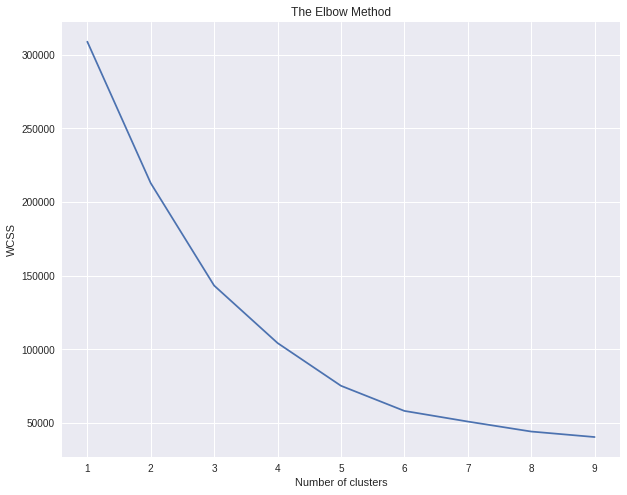

In [12]:
array = customers.values

X = array[:, 2:5]

# inertia...
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)
model.fit(X)

#  Where are the clusters?
#  the model to give us its means for cluster - centronoids
means = model.cluster_centers_

# convert above means back dataframe
clusters = pandas.DataFrame(means, columns=['Age','Annual Income','Spending Score'])
clusters

,Age,Annual Income,Spending Score
0,40.666667,87.750000,17.583333
1,43.088608,55.291139,49.569620
2,25.521739,26.304348,78.565217
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


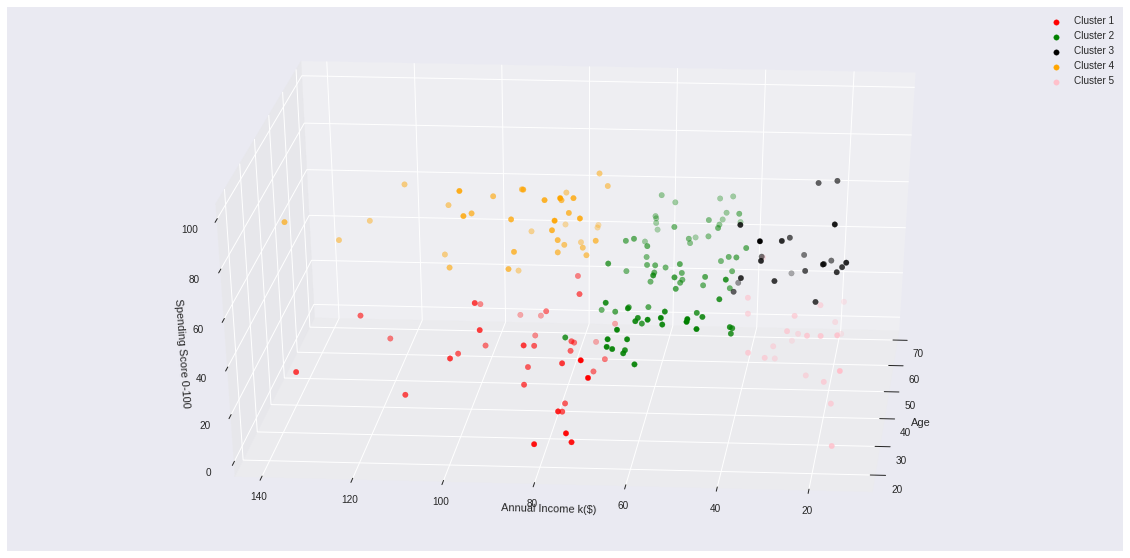

In [14]:
# Show the clusters in a graph
import matplotlib.pyplot as plt
plt.style.use("seaborn")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection = '3d')

customers['label']  = model.labels_
ax.scatter(customers['Age'][customers['label']==0],  customers['Annual Income'][customers['label']==0], 
          customers['Spending Score'][customers['label']==0], c = 'red', s = 30, label='Cluster 1')


ax.scatter(customers['Age'][customers['label']==1],  customers['Annual Income'][customers['label']==1], 
          customers['Spending Score'][customers['label']==1], c = 'green', s = 30, label='Cluster 2')


ax.scatter(customers['Age'][customers['label']==2],  customers['Annual Income'][customers['label']==2], 
          customers['Spending Score'][customers['label']==2], c = 'black', s = 30, label='Cluster 3')



ax.scatter(customers['Age'][customers['label']==3],  customers['Annual Income'][customers['label']==3], 
          customers['Spending Score'][customers['label']==3], c = 'orange', s = 30, label='Cluster 4')



ax.scatter(customers['Age'][customers['label']==4],  customers['Annual Income'][customers['label']==4], 
          customers['Spending Score'][customers['label']==4], c = 'pink', s = 30, label='Cluster 5')


plt.xlabel('Age')
plt.ylabel('Annual Income k($)')
ax.set_zlabel('Spending Score 0-100')
ax.view_init(30,185)
plt.legend()
plt.show()